In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Exercice 1 : Un petit échauffement rapide. . .

Vous disposez d’un jeu de données caractérisant des fruits. Vous disposez:
— etiquette_fruit: son label (numéro associé au nom)
— nom_fruit: son nom
— poids
— largeur
— hauteur
— score-couleur: un score calculé à partir des couleurs observées.

#### Q1. Récupérez le jeu données data_mm_fruits.csv et chargez-le dans un dataframe.

In [116]:
fruits = pd.read_csv('./tp_mm_06_res/data_mm_fruits.csv')

#### Q2. Séparez les données en ensemble d’entraînement et de tests. N’utilisez que le poids, la largeur et la hauteur.

In [117]:
# fruits_train = fruits

# train_indexes= np.random.randint(len(fruits), size=int(len(fruits)*0.8))
# train_fruits = fruits.iloc[train_indexes]

# test_fruits = fruits.diff(train_fruits)
# test_fruits = fruits.merge(train_fruits, how="outer", indicator=True).query('_merge=="left_only"').drop('_merge', axis=1)

# cond = fruits[].isin(train_fruits)
# test_fruits = fruits.merge(train_fruits, how='left')

# df1[~df1.isin(df2)].dropna()
# train_fruits
# test_fruits
# train_fruits

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(fruits[['poids', 'largeur', 'hauteur']], fruits['etiquette_fruit'], train_size=0.8)

xtrain


,poids,largeur,hauteur
22,54.29,7.97,6.38
13,59.87,8.21,5.36
55,92.80,8.47,5.69
57,133.54,7.08,7.02
80,85.45,5.36,8.24
...,...,...,...
29,72.15,7.91,7.62
26,98.60,9.63,6.59
61,128.65,8.32,7.02
69,67.21,6.72,6.10


#### Q3. Affichez les données selon le poids, la taille et la hauteur, par nom, afin de voir si des familles émergent. Pour cela, le module mpl_toolkits.mplot3d import Axes3D peut s’avérer utile

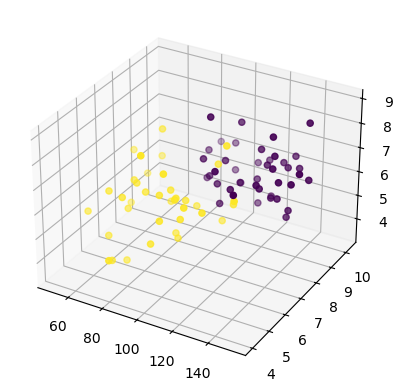

In [118]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xtrain['poids'], xtrain['largeur'], xtrain['hauteur'], c=ytrain)

#### Q4. On peut voir différentes familles se dessiner. Un modèle de prédiction par similarité semble être une bonne piste. Entraînez un modèle K-Nearest Neighbors avec d’abord un voisinage de 1, puis avec un voisinage de 5. Vérifiez l’augmentation de la précision du modèle qui doit théoriquement suivre l’élargissement du voisinage.

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# pour l’entrainement
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

pred = knn.predict(fruits[['poids', 'largeur', 'hauteur']])

print(sklearn.metrics.classification_report(fruits['etiquette_fruit'], pred))


              precision    recall  f1-score   support

           1       0.79      0.88      0.83        50
           2       0.86      0.76      0.81        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



#### Q5. Voici une nouvelle observation: [20,4.3,5.5]. Utilisez votre modèle pour prédire le type de fruits correspondant.

In [120]:
pred = knn.predict(pd.DataFrame(data=[[20,4.3,5.5]], columns=['poids', 'largeur', 'hauteur']))

print(pred)

[2]


## Exercice 2 : Reconnaissance de caractères

Un jeu de données très célèbre est l’ensemble MNIST. Il est constitué d’un ensemble de 70000 images 28x28 pixels en noir et blanc annotées du chiffre correspondant (entre 0 et 9). L’objectif de ce jeu de données était de permettre à un ordinateur d’apprendre à reconnaître des nombres manuscrits automatiquement (pour lire des chèques par exemple).
Ce dataset utilise des données réelles qui ont déjà été pré-traitées pour être plus facilement utilisables par un algorithme.
Afin d’utiliser ce jeu de données, le préambule suivant est nécessaire:

```python
from sklearn.datasets import fetch_openml
mnist = fetch_openml(’mnist_784’, version=1)
```

On accède aux données via un .data et au résultat de classification via un .target.

#### Q1. Premières manipulations.

#### Q1.1. Chargez le dataset en mémoire et affichez sa taille.

In [121]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

mnist_df = mnist.data

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### Q1.2. Récupérez les données liées au 42ème caractère, reconstituez l’image et affichez-la grâce à la méthode plt.imshow(..., cmap=plt.cm.gray, interpolation=’nearest’). L’option d’interpolation sert juste à lisser l’affichage alors que l’option cmap spécifie un affichage en niveaux de gris. Vous devriez obtenir l’image suivante:

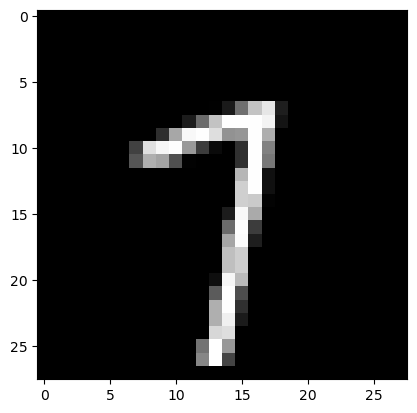

In [122]:
row_42 = mnist_df.iloc[[42]]

image_matrix = row_42.to_numpy().reshape(28, 28)

plt.imshow(image_matrix, cmap=plt.cm.gray, interpolation='nearest')

#### Q1.3. De la même manière, affichez la classification réelle de ce caractère.

In [123]:
mnist.target.iloc[42]

'7'

#### Q2. Le jeu de données est trop volumineux. . .

#### Q2.1. La taille du jeu de données étant assez conséquent, il est nécessaire de faire un échantillonnage et ne travailler que un sous ensemble des données. Extrayez 5000 données sur lesquelles travailler.

In [124]:
images = mnist_df.iloc[:5000]
result = mnist.target[:5000]

#### Q2.2. Maintenant, il convient de séparer nos données en un jeu d’entraînement (80% du volume) et d’un jeu de test.

In [125]:
xtrain, xtest, ytrain, ytest = train_test_split(images, result, train_size=0.8)

#### Q3. Entrainons un premier modèle.

#### Q3.1. Entrainez un modèle basé sur les K-Nearest Neighbors avec k=6.

In [126]:
# pour l’entrainement
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain, ytrain)




KNeighborsClassifier(n_neighbors=6)

#### Q3.2. Réalisez une prédiction pour le 3ème élément de l’ensemble de test et confrontez la prédiction et la réalité.

In [127]:
pred = knn.predict(np.array(xtest.iloc[2]).reshape((1, -1)))


print(pred)
print(ytest.iloc[2])

['0']
0


c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### Q3.3. Évaluez la précision sur l’ensemble de test.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.99      0.96        92
           1       0.86      0.99      0.92       113
           2       0.98      0.88      0.93        94
           3       0.87      0.93      0.90        94
           4       0.91      0.88      0.90       108
           5       0.93      0.84      0.89        83
           6       0.92      0.98      0.95        92
           7       0.94      0.97      0.96       117
           8       0.99      0.85      0.91        99
           9       0.88      0.84      0.86       108

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



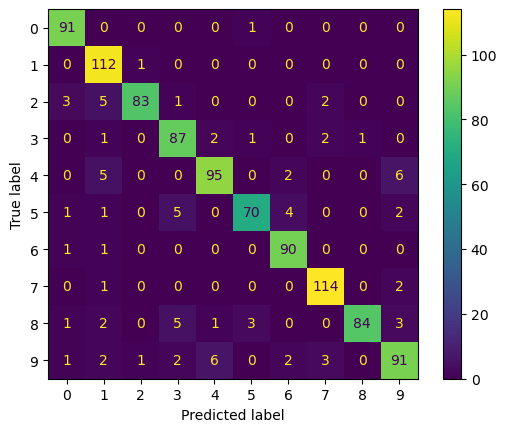

In [128]:
# pour les prédictions
pred = knn.predict(xtest.values)
# calcul de la matrice de confusion
conf_matrix = confusion_matrix(ytest, pred)
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot()
# calcul des autres indicateurs
print(sklearn.metrics.classification_report(ytest, pred))

#### Q4. Malgré les bonnes performances, on peut se poser la question de la pertinence du choix arbitraire de la taille du voisinage.

#### Q4.1. Cherchons à optimiser notre hyper-paramètre k, afin de miniser notre erreur. Pour trouver la valeur optimale, on va simplement tester le modèle pour tous les k de 2 à 15, mesurer l’erreur test et afficher la performance en fonction de k :

In [129]:
for n in range(2, 15):	
	knn = KNeighborsClassifier(n_neighbors=n)
	knn.fit(xtrain, ytrain)

	pred = knn.predict(xtest.values)

	print(sklearn.metrics.classification_report(ytest, pred))

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        92
           1       0.83      0.98      0.90       113
           2       0.90      0.89      0.90        94
           3       0.86      0.95      0.90        94
           4       0.90      0.93      0.91       108
           5       0.88      0.86      0.87        83
           6       0.97      0.96      0.96        92
           7       0.94      0.95      0.94       117
           8       1.00      0.78      0.88        99
           9       0.96      0.81      0.88       108

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.91      0.91      1000



c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        92
           1       0.85      0.99      0.91       113
           2       0.93      0.89      0.91        94
           3       0.92      0.95      0.93        94
           4       0.93      0.89      0.91       108
           5       0.96      0.89      0.92        83
           6       0.95      0.97      0.96        92
           7       0.96      0.96      0.96       117
           8       1.00      0.86      0.92        99
           9       0.89      0.86      0.87       108

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        92
           1       0.86      0.98      0.92       113
           2       0.94      0.88      0.91        94
           3       0.91      0.94      0.92        94
           4       0.91      0.91      0.91       108
           5       0.95      0.90      0.93        83
           6       0.94      0.97      0.95        92
           7       0.96      0.97      0.97       117
           8       1.00      0.85      0.92        99
           9       0.91      0.84      0.87       108

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.92      1000



c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.99      0.95        92
           1       0.85      0.98      0.91       113
           2       0.95      0.88      0.92        94
           3       0.90      0.94      0.92        94
           4       0.93      0.86      0.89       108
           5       0.92      0.87      0.89        83
           6       0.92      0.97      0.94        92
           7       0.94      0.97      0.95       117
           8       1.00      0.85      0.92        99
           9       0.86      0.85      0.86       108

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.99      0.96        92
           1       0.86      0.99      0.92       113
           2       0.98      0.88      0.93        94
           3       0.87      0.93      0.90        94
           4       0.91      0.88      0.90       108
           5       0.93      0.84      0.89        83
           6       0.92      0.98      0.95        92
           7       0.94      0.97      0.96       117
           8       0.99      0.85      0.91        99
           9       0.88      0.84      0.86       108

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        92
           1       0.86      0.99      0.92       113
           2       0.98      0.88      0.93        94
           3       0.92      0.93      0.92        94
           4       0.93      0.86      0.89       108
           5       0.93      0.89      0.91        83
           6       0.92      0.98      0.95        92
           7       0.94      0.97      0.96       117
           8       0.98      0.86      0.91        99
           9       0.85      0.85      0.85       108

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.97      0.95        92
           1       0.85      0.98      0.91       113
           2       0.96      0.86      0.91        94
           3       0.87      0.93      0.90        94
           4       0.92      0.86      0.89       108
           5       0.94      0.87      0.90        83
           6       0.93      0.98      0.95        92
           7       0.93      0.97      0.95       117
           8       0.98      0.86      0.91        99
           9       0.84      0.83      0.84       108

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        92
           1       0.85      0.98      0.91       113
           2       0.98      0.87      0.92        94
           3       0.89      0.91      0.90        94
           4       0.93      0.86      0.89       108
           5       0.93      0.86      0.89        83
           6       0.92      0.98      0.95        92
           7       0.93      0.97      0.95       117
           8       0.98      0.86      0.91        99
           9       0.84      0.85      0.84       108

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.91      0.91      1000

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        92
           1       0.85      0.99      0.92       113
           2       0.99      0.87      0.93        94
           3       0.89 

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.97      0.95        92
           1       0.85      0.99      0.91       113
           2       0.98      0.87      0.92        94
           3       0.89      0.91      0.90        94
           4       0.93      0.86      0.89       108
           5       0.93      0.86      0.89        83
           6       0.91      0.98      0.94        92
           7       0.93      0.97      0.95       117
           8       0.98      0.87      0.92        99
           9       0.86      0.85      0.86       108

    accuracy                           0.91      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.91      0.91      1000

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        92
           1       0.82      0.99      0.90       113
           2       0.99      0.85      0.91        94
           3       0.89 

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        92
           1       0.84      0.99      0.91       113
           2       0.99      0.86      0.92        94
           3       0.91      0.91      0.91        94
           4       0.92      0.86      0.89       108
           5       0.94      0.88      0.91        83
           6       0.92      0.98      0.95        92
           7       0.93      0.97      0.95       117
           8       0.98      0.87      0.92        99
           9       0.87      0.85      0.86       108

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.92      0.92      0.91      1000



c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.97      0.95        92
           1       0.82      0.98      0.89       113
           2       0.98      0.85      0.91        94
           3       0.88      0.91      0.90        94
           4       0.93      0.86      0.89       108
           5       0.92      0.84      0.88        83
           6       0.92      0.98      0.95        92
           7       0.93      0.96      0.94       117
           8       0.97      0.85      0.90        99
           9       0.87      0.85      0.86       108

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



#### Q5. Entrainez le modèle bien calibré. Affichez en une figure 12 images choisies aléatoirement et les valeurs prédites correspondantes.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-

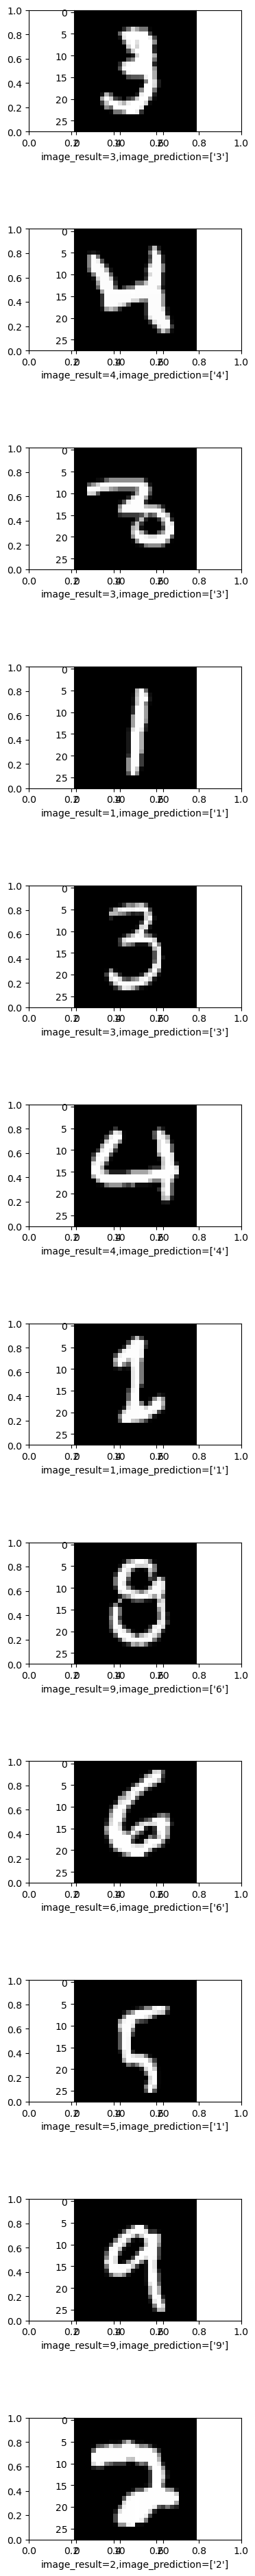

In [130]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)


rows = 12
columns = 1
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*4, rows*4))
plt.subplots_adjust(hspace=0.8)

for index in range(1, rows + 1):
	image_index = index * 10

	image = images.iloc[[image_index]]
	image_matrix = image.to_numpy().reshape(28, 28)
	image_result = result.iloc[[image_index]].to_numpy()[0]

	image_prediction = knn.predict(image.values)

	fig.add_subplot(rows, columns, index)
	plt.imshow(image_matrix, cmap=plt.cm.gray, interpolation='nearest')
	plt.xlabel('image_result=' + str(image_result) + ',image_prediction=' + str(image_prediction))

#### Q6. De manière similaire, affichez en une figure de 12 images aléatoires des cas pour lesquels la prédiction était fausse. On affichera l’image reconstitutée et la prédiction.

## Exercice 3 : Prise en main des données

Nous allons travailler à la prédiction des chances de survie pour les passagers d’un célèbre navire, le Titanic, en fonction de leurs caractéristiques. Le jeu de données est structuré de la manière suivante:
- PassengerId (int): numéro d’identification du passager
- Survived (bool): 0 si le passager n’a pas survécu, 1 sinon
- Pclass (int): numéro de la classe du passager (1, 2 ou 3)
- Name (str): nom d’enregistrement du passager
- Sex (str): genre du passager (male / female)
- Age (float): age du passager
- SibSp (int): nombre de frères /sœurs / conjoint(e) à bord du navire
- Parch (int): nombre de parents / enfants à bord du navire
- Ticket (int): numéro du ticket
- Fare (float): prix du ticket payé à l’embarquement
- Embarked (char): une lettre correspondant au type d’embarquement
Nous allons effectué de l’apprentissage supervisé: la colonne qui nous intéresse particulièrement est la colonne
Survived. C’est cette colonne qu’on va chercher à prédire. Malheureusement, le jeu de données n’est pas forcément utilisable en l’état et quelques ajustements vont être nécessaires.

#### Q1. Récupérez le jeu de données du fichier data_mm_titanic.csv. Chargez-le en mémoire et affichez les 5 premières lignes.

In [131]:
titanic = pd.read_csv('./tp_mm_06_res/data_mm_titanic.csv')

print(titanic.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### Q2. Commençons par nettoyer les données. D’une manière générale, s’il y a trop de valeurs manquantes, on ne peut rien faire. Il toujours est possible de supprimer les colonnes en question. Cependant, pour certains types de variables, il est possible de substituer une valeur plausible aux valeurs nulles. Regardons ce qu’on peut faire ici.

#### Q2.1. Déterminez quelles sont les colonnes contenant des valeurs nulles, et combien sont-elles (au total et par colonne) ?

In [132]:
titanic.isnull().sum()

# nulls
# Age -> 177, Cabin -> 687, Embarked -> 2

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Q2.2. La colonne contenant le plus de valeurs nulles n’est pas utilisable. Supprimez-la de votre jeu de données.

In [133]:
titanic = titanic.drop(['Cabin'], axis=1)

#### Q2.3. Une colonne contient uniquement 2 valeurs nulles. Comme cette colonne est de type textuelle, on va remplacer les valeurs nulles par la valeur qu’on retrouve le plus souvent dans la colonne. Établissez d’abord la liste des valeurs uniques qu’on retrouve dans la colonne ainsi que le nombre d’occurences associé de chacune. L’utilisation de mode() semble particulièrement appropriée.

In [134]:
titanic.groupby('Embarked')['Embarked'].count()

titanic['Embarked'] = titanic['Embarked'].fillna('S')

#### Q2.4. Reste la dernière colonne contenant des valeurs manquantes à traiter. Quelle valeur pourrait-on substituer aux valeurs manquantes ? Dessinez la distribution empirique des âges et faites apparaître la médiane.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


median age=28.0


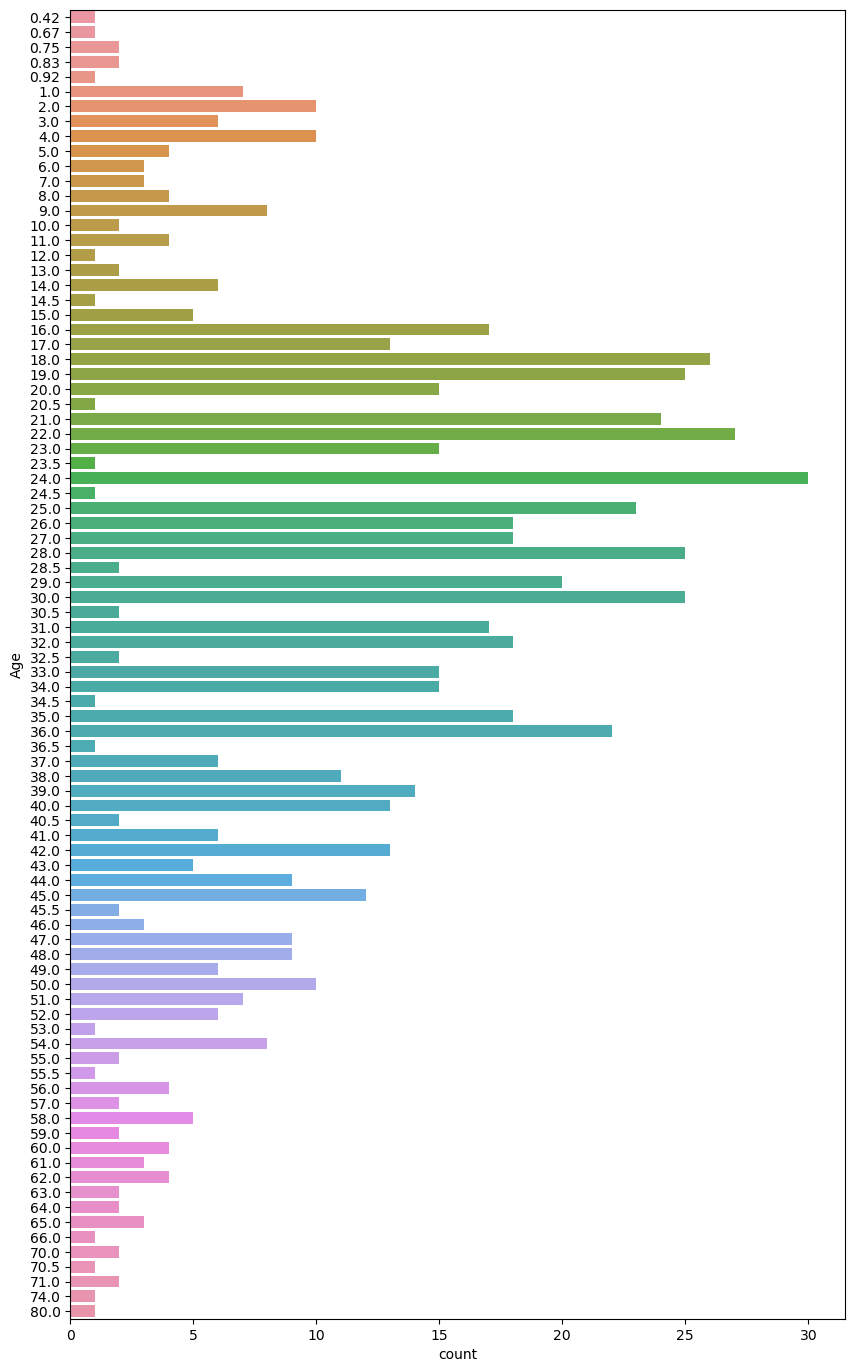

In [135]:
plt.figure(figsize=(10,17))
sns.countplot(y=titanic['Age'])

print('median age=' + str(titanic['Age'].median()))

#### Q2.5. Les données s’étalent de manière significative autour de la valeur médiane: la solution n’est pas très satisfaisante. On peut trouver une meilleure solution (peut-être non optimale mais facile d’accès). Quelle variable est plus corrélée avec l’âge: la classe dans le navire (Pclass) ou le prix du billet (Fare) ?

In [136]:
# plt.scatter(x=titanic['Age'])

corr1 = titanic['Age'].corr(titanic['Pclass'])
corr2 = titanic['Age'].corr(titanic['Fare'])

print(corr1)
print(corr2)

-0.36922601531551713
0.09606669176903888


#### Q2.6. Tracez des boîtes à moustaches des âges par catégorie. Si les boîtes sont différentes les unes des autres, il conviendra de remplacer les âges manquants par différentes valeurs.

c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jez\.conda\envs\tp_mm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pclass', ylabel='Age'>

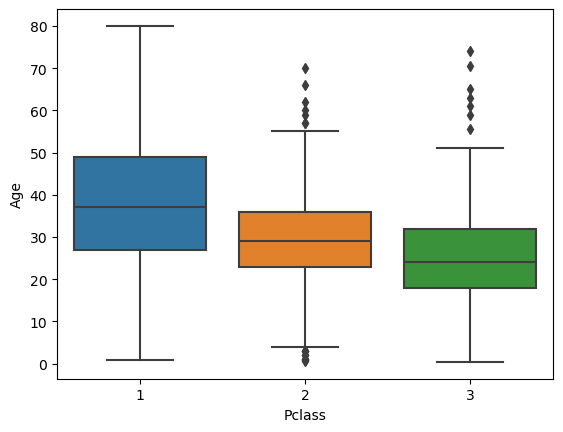

In [140]:
sns.boxplot(y=titanic['Age'], x=titanic['Pclass'])

# titanic[['Age'], ['Dclass']].plot(kind='box')

#### Q2.7. Remplacez chacune des valeurs manquantes par la valeur médiane des âges des passagers la même classe. La méthode .apply(...) permet d’appliquer une méthode à définir par vous mêmes aux éléments d’une colonne, et paraît utile dans ce cas.

In [149]:
def fillNulls(age, Pclass):
	# print(age == pd.NA)
	if np.isnan(age):
		if Pclass == 1:
			return 38.0
		elif Pclass == 2:
			return 30.0
		else:
			return 27.0
	else:
		return age


titanic['Age'] = titanic.apply(lambda line: fillNulls(line['Age'], line['Pclass']), axis=1)

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Q3. Certaines méthodes préfèrent les valeurs numériques que les chaînes de caractères pour opérer. Prenons le cas du genre (colonne Sex). Utilisez la méthode get_dummies(...) afin de créer une nouvelle colonne (nommée male), équivalente, mais contenant des booléens.

In [155]:
titanic['male'] = pd.get_dummies(data=titanic['Sex'], columns='male', drop_first=True)

#### Q4. Une dernière transformation peut être nécessaire: normalisons certaines données.

#### Q4.1. Affichez la description détaillée du jeu de données. Certains algorithmes d’apprentissage sont sensibles aux différences d’échelles de valeurs (pour les variables non catégorielles). Quelles sont les deux variables qui ont une échelle de valeurs sensiblement différentes des autres ?

In [156]:
titanic.describe()
# SibSp
# Parch

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.570337,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.132890,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
